# Importing Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [13]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


# Implementing Thompson Sampling

In [28]:
import random
N=500
d=10
ads_selected=[]
number_of_rewards_0=[0]*d
number_of_rewards_1=[0]*d
total_rewards=0

for n in range(0,N):
    ad=0
    max_random=0
    for i in range(0,d):
        random_beta=random.betavariate(number_of_rewards_1[i]+1,number_of_rewards_0[i]+1)
        
        if(random_beta>max_random):
            max_random=random_beta
            ad=i
        
    ads_selected.append(ad)
    reward=dataset.values[n,ad]
    if reward==1:
        number_of_rewards_1[ad]=number_of_rewards_1[ad]+1
    else:
        number_of_rewards_0[ad]=number_of_rewards_0[ad]+1
    
    total_rewards=total_rewards+reward

# Visualising the results

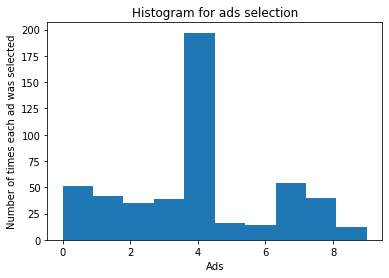

In [29]:
plt.hist(ads_selected)
plt.title('Histogram for ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()